In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense,Flatten,Dropout,BatchNormalization

In [ ]:
train_dir_path = "/content/drive/MyDrive/Chest_Xray/chest_xray/train"
val_dir_path = "/content/drive/MyDrive/Chest_Xray/chest_xray/val"
test_dir_path = "/content/drive/MyDrive/Chest_Xray/chest_xray/test"

IMAGE_SIZE= (224,224)
BATCH_SIZE = 32
train_datagen=ImageDataGenerator(rescale=1/255,rotation_range=15,brightness_range=(0.8,1.5))
test_datagen=ImageDataGenerator(rescale=1/255)
val_datagen=ImageDataGenerator(rescale=1/255,rotation_range=15,brightness_range=(0.8,1.5))

training_set=train_datagen.flow_from_directory(train_dir_path, target_size=IMAGE_SIZE, batch_size=BATCH_SIZE)
val_set=val_datagen.flow_from_directory(val_dir_path, target_size=IMAGE_SIZE, batch_size=BATCH_SIZE)
test_set=test_datagen.flow_from_directory(test_dir_path, target_size=IMAGE_SIZE, batch_size=BATCH_SIZE)

Found 4623 images belonging to 2 classes.
Found 609 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


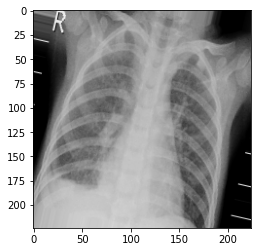

In [ ]:
plt.imshow(training_set[0][0][29])

In [ ]:
base_model = tf.keras.applications.mobilenet_v2.MobileNetV2(input_shape=[224,224,3],include_top=False,weights='imagenet')
base_model.trainable = False
base_model.summary()

9420800/9406464 [==============================] - 0s 0us/step
Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 112, 112, 32) 0           bn_Conv1[0][0]                   
________________

In [ ]:
x = Flatten()(base_model.output)
x = Dense(units=56,activation='relu')(x)
x = BatchNormalization()(x)
x = Dense(units=512,activation='relu')(x)
x = BatchNormalization()(x)
x = Dense(units=256,activation='relu')(x)
x = Dense(units=2,activation='softmax')(x)
model = tf.keras.Model(inputs = base_model.input,outputs = x)
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 112, 112, 32) 0           bn_Conv1[0][0]                   
______________________________________________________________________________________________

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=2e-3),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=[tf.keras.metrics.BinaryAccuracy(),
                        tf.keras.metrics.FalseNegatives(),
                        tf.keras.metrics.FalsePositives(),
                        tf.keras.metrics.Precision(),
                        tf.keras.metrics.Recall()])

In [ ]:
history = model.fit(training_set,epochs=50,validation_data=val_set)
tf.keras.models.save_model(model,"/content/drive/MyDrive/Chest_Xray/difecta_model")

Epoch 1/50
145/145 [==============================] - 1162s 8s/step - loss: 0.1651 - binary_accuracy: 0.9388 - false_negatives: 283.0000 - false_positives: 283.0000 - precision: 0.9388 - recall: 0.9388 - val_loss: 0.0984 - val_binary_accuracy: 0.9787 - val_false_negatives: 13.0000 - val_false_positives: 13.0000 - val_precision: 0.9787 - val_recall: 0.9787
Epoch 2/50
145/145 [==============================] - 272s 2s/step - loss: 0.0842 - binary_accuracy: 0.9656 - false_negatives: 159.0000 - false_positives: 159.0000 - precision: 0.9656 - recall: 0.9656 - val_loss: 0.1295 - val_binary_accuracy: 0.9557 - val_false_negatives: 27.0000 - val_false_positives: 27.0000 - val_precision: 0.9557 - val_recall: 0.9557
Epoch 3/50
145/145 [==============================] - 271s 2s/step - loss: 0.0764 - binary_accuracy: 0.9710 - false_negatives: 134.0000 - false_positives: 134.0000 - precision: 0.9710 - recall: 0.9710 - val_loss: 0.0895 - val_binary_accuracy: 0.9655 - val_false_negatives: 21.0000 - va

/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


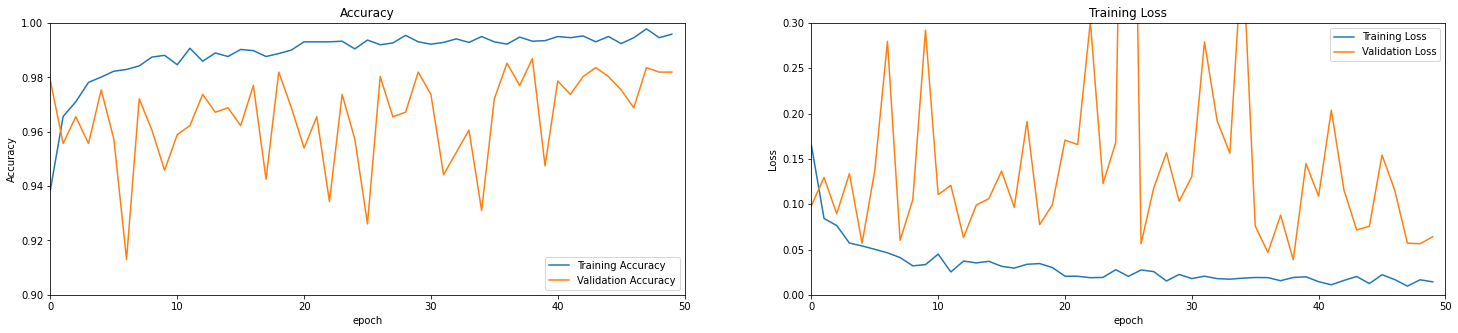

In [ ]:
train_loss=history.history['loss']
train_accuracy=history.history['binary_accuracy']
val_loss = history.history['val_loss']
val_accuracy = history.history['val_binary_accuracy']

plt.figure(figsize=(25, 5))
plt.subplot(1, 2, 1)
plt.plot(train_accuracy, label='Training Accuracy')
plt.plot(val_accuracy,label="Validation Accuracy")
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.xlim([0,50])
plt.ylim([0.9,1])
plt.legend()
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.ylabel('Loss')
plt.ylim([0,0.3])
plt.xlim([0,50])
plt.title('Training Loss')
plt.xlabel('epoch')
plt.legend()
plt.show()

In [ ]:
loaded_model = tf.keras.models.load_model("/content/drive/MyDrive/Chest_Xray/difecta_model")
loaded_model.evaluate(test_set)

20/20 [==============================] - 25s 1s/step - loss: 1.3574 - binary_accuracy: 0.8638 - false_negatives: 85.0000 - false_positives: 85.0000 - precision: 0.8638 - recall: 0.8638


[1.3574498891830444,
 0.8637820482254028,
 85.0,
 85.0,
 0.8637820482254028,
 0.8637820482254028]

In [ ]:
saved_model = tf.keras.models.load_model("/content/drive/MyDrive/Chest_Xray/difecta_model")

Saving NORMAL2-IM-0196-0001.jpeg to NORMAL2-IM-0196-0001.jpeg


Predicted class :  pneumonia 
Probability :  1.0 



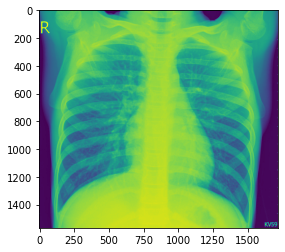

In [ ]:
from PIL import Image,ImageOps
from tensorflow.keras.preprocessing.image import img_to_array 
import os
from google.colab import files

uploaded = files.upload()
for fn in uploaded.keys():
    name = fn

classes = ['normal','pneumonia']

image = Image.open(name)
plt.imshow(image)
temp1 = image
#image = ImageOps.grayscale(image)
#temp=tf.image.grayscale_to_rgb(temp)


def make_square(im, min_size=64, fill_color=(0, 0, 0)):
    x, y = im.size
    size = max(min_size, x, y)
    new_im = Image.new('RGB', (size, size), fill_color)
    new_im.paste(im, (int((size - x) / 2), int((size - y) / 2)))
    return new_im
image = image.resize((224,224))
image = make_square(image)
image = img_to_array(image)
image = tf.image.resize(image,[224,224])/255.0
image = tf.reshape(image,(1,224,224,3))
prediction = saved_model.predict(image)
print("\n\nPredicted class : ",classes[np.argmax(prediction)],"\nProbability : ",prediction[0][np.argmax(prediction)],"\n")
os.remove(name)

temp1 = img_to_array(temp1)